# Training a convolutional neural network on the [MNIST](https://en.wikipedia.org/wiki/MNIST_database) data. 

The original code in script form is [here](https://github.com/fchollet/keras/blob/master/examples/mnist_cnn.py).

In [1]:
# Import some stuff
from __future__ import print_function, absolute_import, division
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils


Using Theano backend.


# Neural Network Settings

Here are most of the settings that describe the neural network we use.

- Iterations:  These values set the number of iterations.
    - **`batch_size`**: The number of samples per gradient update. Bigger values make the gradient update more accurate, but mean it takes longer to train the neural network
    - **`nb_epoch`**: The number of times to go through all of the training data. Since `batch_size` is less than the full training set size, each "epoch" will be updating the gradient multiple times. So basically, the number of iterations is `nb_epoch * sample_size / batch_size`.    
- **`nb_classes`**: The number of classes in the output. For this dataset, it is the numbers 0-9.
- Convolution Filter settings: Used in the `Convolution2D` layers. In this case, we have two identical convolution layers.
    - **`nb_filters`**: The number of convolution filters. Each image is convolved with all of these filters.
    - **`nb_conv`**: The number of rows and columns in the convolution filters. In this case, each filter is a 3x3 kernel.
    
- **`nb_pool`**: Factor by which to downscale the image (in this case the convolved images) before going to the "normal" part of the neural network. This speeds things up, since it reduces the number of features. Used in the `MaxPooling2d` layer.
- Dropout parameters: These are used in the `Dropout` layers. The layer randomly sets a fraction `p` of the input units to 0 at each gradient update. It helps to prevent overfitting. The parameters are:
    - **`conv_dropout`**: Used in the convolution stage
    - **`dense_dropout`**: Used in the "normal" stage
- **`nb_hidden`**: The number of hidden layers in the "normal" part of the neural network.

# Network Visualization:

The neural network looks similar to this one, although this one has an extra pooling step and one more hidden layer in the "normal" part of the network:

<img src="http://d3kbpzbmcynnmx.cloudfront.net/wp-content/uploads/2015/11/Screen-Shot-2015-11-07-at-7.26.20-AM.png">

The steps of this neural network are:

1. The original image
2. 1st convolution layer. The result is a bunch of images that are distorted versions of the original
3. Second convolution layer. Convolves all of the convolved images.
4. Pooling layer (downsamples the images). In the image above, there is a pooling layer after each convolution layer. In our network, there is only one pooling layer after both convolutions are done.
5. Fully-connected layer. Each pixel of each image from the previous layer goes into a "normal" neural network node (I think that is how it goes from convolution stage to normal stage at least...)
6. Fully-connected output layer. Each of the outputs from the previous layer is fed into ten nodes that produce probabilities for each class.

In [2]:
# Set some constants
batch_size = 128
nb_classes = 10    
nb_epoch = 12      

# input image dimensions
img_rows, img_cols = 28, 28
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
nb_pool = 2
# convolution kernel size
nb_conv = 3

# Dropout parameters
conv_dropout = 0.25
dens_dropout = 0.5

# Set hidden layer size
nb_hidden = 128


## Get the training data

In [3]:
# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

X_train shape: (60000, 1, 28, 28)
60000 train samples
10000 test samples


## Setup the model

In [4]:
model = Sequential()

model.add(Convolution2D(nb_filters, nb_conv, nb_conv,
                        border_mode='valid',
                        input_shape=(1, img_rows, img_cols)))
model.add(Activation('relu'))
model.add(Convolution2D(nb_filters, nb_conv, nb_conv))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Dropout(conv_dropout))

model.add(Flatten())
model.add(Dense(nb_hidden))
model.add(Activation('relu'))
model.add(Dropout(dens_dropout))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

## Fit the model

In [5]:
import time
t1 = time.time()
model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch,
          verbose=1, validation_data=(X_test, Y_test))
t2 = time.time()
print('Training Finished in {} minutes.'.format((t2-t1)/60))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 112s - loss: 0.3949 - acc: 0.8804 - val_loss: 0.1023 - val_acc: 0.9677
Epoch 2/12
60000/60000 [==============================] - 113s - loss: 0.1486 - acc: 0.9561 - val_loss: 0.0658 - val_acc: 0.9801
Epoch 3/12
60000/60000 [==============================] - 111s - loss: 0.1124 - acc: 0.9667 - val_loss: 0.0519 - val_acc: 0.9833
Epoch 4/12
60000/60000 [==============================] - 111s - loss: 0.0946 - acc: 0.9721 - val_loss: 0.0458 - val_acc: 0.9844
Epoch 5/12
60000/60000 [==============================] - 111s - loss: 0.0813 - acc: 0.9762 - val_loss: 0.0414 - val_acc: 0.9862
Epoch 6/12
60000/60000 [==============================] - 111s - loss: 0.0722 - acc: 0.9784 - val_loss: 0.0409 - val_acc: 0.9866
Epoch 7/12
60000/60000 [==============================] - 111s - loss: 0.0666 - acc: 0.9808 - val_loss: 0.0361 - val_acc: 0.9879
Epoch 8/12
60000/60000 [=======================

In [6]:
# Evaluate
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.0387651254472
Test accuracy: 0.9877


# Visualize the inputs and predictions

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

%matplotlib inline

In [8]:
def show_predictions(i):
    X = X_test[i:i+1, :1]
    digit_probs = model.predict_proba(X)[0]
    idx = np.argmax(digit_probs)
    
    actual = np.argmax(Y_test[i])
    
    # Plot
    fig, ax = plt.subplots(1, 1)
    ax.imshow(X[0, 0])
    ax.set_title('Predicted Digit = {}\nActual digit = {}'.format(idx, actual))

1/1 [==============================] - 0s


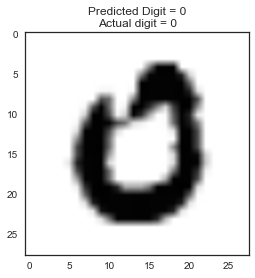

In [9]:
# Run this lots of times to visualize the testing set
show_predictions(np.random.randint(X_test.shape[0]))

# Save fitted model

In [12]:
import output_model
output_model.save_model(model, 'MNIST_cnn_model')

[WARNING] MNIST_cnn_model/weights.h5 already exists - overwrite? [y/n]n
